In [2]:
import numpy as np
import matplotlib.pyplot as plt

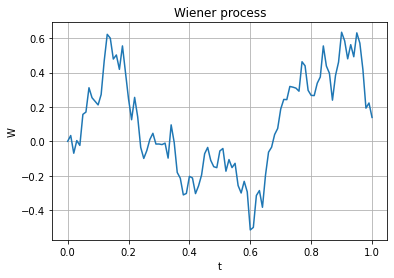

In [12]:
#lab1

def brownian_motion(X, N, T): 
  W = np.zeros(N+1)
  W[0] = 0
  delta = T/N
  for i in range (1, N+1):
    W[i] = W[i-1] + np.random.normal(0, 1, 1) * np.sqrt(delta)
  return W

N = 100
T = 1
t = np.array([i / N * T for i in range(N+1)]) 

W = brownian_motion(X, N, T)

plt.grid()
plt.plot(X, W)
plt.title('Wiener process')
plt.xlabel('t')
plt.ylabel('W')
plt.show()

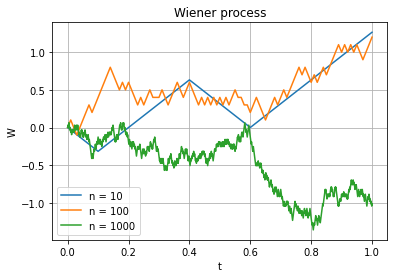

In [4]:
#lab2

def runif(n):
    L = np.zeros(n)
    for i in range(n):
        L[i] = 2 * (np.random.uniform(0, 1) > 0.5) - 1
    return L

def random_walk(x, n, s):
    if x * n > 0:
        return s[int(x * n)-1] 
    else:
        return 0

 
plt.grid()
N = 100
n = [10, 100, 1000]
T = 1

for n_value in n:
    t = [i / n_value for i in range(n_value+1)] 
    s = np.cumsum(runif(n_value))
    W = [random_walk(x, n_value, s) / np.sqrt(n_value) for x in t]
    plt.plot(t, W, label = f"n = {n_value}") 

plt.title('Wiener process')
plt.xlabel('t')
plt.ylabel('W')
plt.legend()
plt.show()

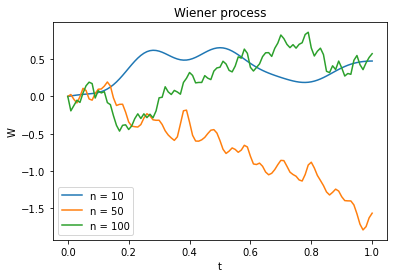

In [6]:
#lab3

def phi(i, t, T):
  return (2 * np.sqrt (2 * T)) / ((2 * i + 1) * np.pi) * np.sin((( 2 * i + 1) * np.pi * t) / (2 * T))

def sum_W(t, T, Z):
    Sum = 0
    for i in range(len(Z)):
        Sum += Z[i] * phi(i, t, T)
    return Sum

def L2_expansion(T, N, t):
    n = [10, 50, 100]
    W = np.zeros(N+1)

    for n_value in n:
        Z = np.random.normal(0, 1, n_value)
        for i in range(N+1):
            W[i] = sum_W(t[i], T, Z)
        plt.plot(t, W, label = f"n = {n_value}")

    plt.title ('L2_expansion')
    plt.xlabel ("t")
    plt.ylabel ("W")
    plt.legend()
    plt.show()

N = 100    
T = 1
t = np.array([i / N * T for i in range(N+1)])

L2_expansion(T, N, t)

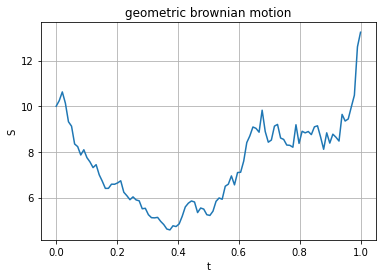

In [20]:
#lab4

def geometric_brownian_motion(T, N, t):
    r = 1
    sigma = 0.5
    x = 10
    W = np.zeros(N)
    delta = T/N

    for i in range(1, N):
        W[i] = W[i-1] + np.random.normal(0, 1, 1) * np.sqrt(delta)
        S = [x * np.exp((r - sigma ** 2 / 2) * t[i] + sigma * W[i]) for i in range (len(W))]
    plt.grid()
    plt.plot(t, S)
    plt.title('geometric brownian motion')
    plt.xlabel("t")
    plt.ylabel("S")
    plt.show()

N = 100    
T = 1
t= np.linspace(0, T, N)

geometric_brownian_motion(T, N, t)

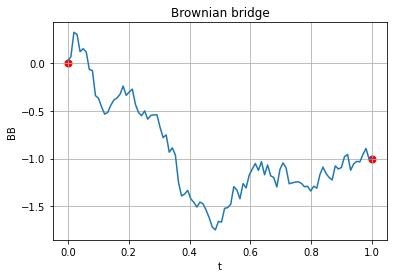

In [17]:
#lab5

def brownian_bridge(T, N, t):
    W = np.zeros(N)
    delta = T/N

    for i in range(N):
        W[i] = W[i-1] + np.random.normal(0, 1, 1) * np.sqrt(delta)
    
    x = 0
    y = -1
    BB = [x + W[i] - t[i] / T * ( W[N-1] - y + x ) for i in range(N)]

    plt.grid()
    plt.plot (t, BB)
    plt.scatter(t[0], x , color ="red",s =50)
    plt.scatter(t[len(t) -1] , y , color ="red", s =50)
    plt.title('Brownian bridge')
    plt.xlabel("t")
    plt.ylabel("BB")
    plt.show()

brownian_bridge(T, N, t)  